# Multithreading

## Implementing Merge Sort using multithreading

In [81]:
import threading
import matplotlib.pyplot as plt
import time
import random

In [2]:
#Since multithreading does not give a return statement we would have to modify merge sort to change 
#the array in place to sort it

#Simple unmodified merge sort

def simple_merge_sort(arr):
    def merge_sort(arr):
        if len(arr) <= 1:
            return arr
        
        mid = len(arr) // 2
        left_half = arr[:mid]
        right_half = arr[mid:]
        
        left_half = merge_sort(left_half)
        right_half = merge_sort(right_half)
        
        return merge(left_half, right_half)
    
    def merge(left, right):
        result = []
        left_idx, right_idx = 0, 0
        while left_idx < len(left) and right_idx < len(right):
            if left[left_idx] < right[right_idx]:
                result.append(left[left_idx])
                left_idx += 1
            else:
                result.append(right[right_idx])
                right_idx += 1
        
        result.extend(left[left_idx:])
        result.extend(right[right_idx:])
        return result
    
    return merge_sort(arr)

In [3]:
#Modified merge sort without multithreading

def modified_merge_sort(arr, start,end):
    def merge(left_start, left_end, right_start, right_end, arr):
        merged_arr = []
        temp=left_start
        while left_start < left_end and right_start < right_end:
            if arr[left_start] < arr[right_start]:
                merged_arr.append(arr[left_start])
                left_start += 1
            else:
                merged_arr.append(arr[right_start])
                right_start += 1
        
        merged_arr += arr[left_start:left_end]
        merged_arr += arr[right_start:right_end]
        arr[temp:right_end]=merged_arr
        return
    
    def merge_sort(arr, start, end):
        if (end-start) <= 1:
            return
        
        mid = (end+start-1) // 2
        
        merge_sort(arr, start, mid+1)
        merge_sort(arr, mid+1, end)
        merge(start, mid+1, mid+1, end, arr)
        return
    
    merge_sort(arr, start, end)

arr = [10,5,6,3,7,8,10]
modified_merge_sort(arr, 0, len(arr))
print(arr)

[3, 5, 6, 7, 8, 10, 10]


In [4]:
#Modified Merge Sort using multithreading in place to use two threads for left and right merging

def multi_mod_merge_sort(arr, start, end):
    def merge(left_start, left_end, right_start, right_end, arr):
        merged_arr = []
        temp=left_start
        while left_start < left_end and right_start < right_end:
            if arr[left_start] < arr[right_start]:
                merged_arr.append(arr[left_start])
                left_start += 1
            else:
                merged_arr.append(arr[right_start])
                right_start += 1
        
        merged_arr += arr[left_start:left_end]
        merged_arr += arr[right_start:right_end]
        arr[temp:right_end]=merged_arr
        return
    
    def merge_sort(arr, start, end):
        if (end-start) <= 1:
            return
        
        mid = (end+start-1) // 2
           
        left_thread = threading.Thread(target=merge_sort, args=(arr, start, mid+1))
        right_thread = threading.Thread(target=merge_sort, args=(arr, mid+1, end))
        
        #it then starts both the processes
        left_thread.start()
        right_thread.start()
        
        #we wait for both process to finish so we can start our merging
        left_thread.join()
        right_thread.join()
        
        merge(start, mid+1, mid+1, end, arr)
        return
    
    merge_sort(arr, start,end)

In [45]:
random_list=[random.randint(1, 1000) for _ in range(8000)]
length=len(random_list)

start_time=time.time()
simple_merge_sort(random_list.copy())
simple_sort_time=time.time()-start_time

start_time=time.time()
modified_merge_sort(random_list.copy(), 0, length)
modified_merge_sort_time=time.time()-start_time

start_time=time.time()
multi_mod_merge_sort(random_list.copy(), 0, length)
multi_mod_merge_sort_time=time.time()-start_time

print(simple_sort_time, end="\n")
print(modified_merge_sort_time, end="\n")
print(multi_mod_merge_sort_time)

#As we can see this sorting method is not the right method

0.0307614803314209
0.015061616897583008


In [63]:
#Changing the merge sort to instead use multiple thread on different parts and then merge it

def changed_threaded_merge_sort(arr, start, end, thread_num):
    def merge(left_start, left_end, right_start, right_end, arr):
        merged_arr = []
        temp=left_start
        while left_start < left_end and right_start < right_end:
            if arr[left_start] < arr[right_start]:
                merged_arr.append(arr[left_start])
                left_start += 1
            else:
                merged_arr.append(arr[right_start])
                right_start += 1
        
        merged_arr += arr[left_start:left_end]
        merged_arr += arr[right_start:right_end]
        arr[temp:right_end]=merged_arr
        return
    
    def merge_sort(arr, start, end):
        if (end-start) <= 1:
            return
        
        mid = (end+start-1) // 2
        
        merge_sort(arr, start, mid+1)
        merge_sort(arr, mid+1, end)
        merge(start, mid+1, mid+1, end, arr)
        return
    
    start=0
    temp=end//thread_num
    for i in range(thread_num-1):
        t=threading.Thread(target=merge_sort, args=(arr, start, temp))
        start=temp
        temp+=(end//thread_num)
        t.start()
    t=threading.Thread(target=merge_sort, args=(arr, temp, end))
    t.start()
    
    for i in range(thread_num):
        t.join()
    
    start=0
    temp=end//thread_num
    start2=temp
    temp2=temp+(end//thread_num)
    for i in range(thread_num-2):
        merge(start, temp, start2, temp2, arr)
        temp=temp2
        start2=temp2
        temp2+=(end//thread_num)
        
    merge(start, temp, start2, end, arr)

In [78]:
#As we can see this becomes more effecient and is comparable to original sorting method

random_list=[random.randint(1, 1000) for _ in range(8000)]
length=len(random_list)

start_time=time.time()
simple_merge_sort(random_list.copy())
simple_sort_time=time.time()-start_time

start_time=time.time()
modified_merge_sort(random_list.copy(), 0, length)
modified_merge_sort_time=time.time()-start_time

start_time=time.time()
changed_threaded_merge_sort(random_list.copy(), 0, length, 4)
changed_threaded_merge_sort_time=time.time()-start_time

print(simple_sort_time, end="\n")
print(modified_merge_sort_time, end="\n")
print(changed_threaded_merge_sort_time)

0.01804494857788086
0.013956308364868164
0.01399993896484375


In [91]:
data={"Simple": 0, "Modified": 0, "Multithreading": 0}
avg_time={"Simple": 0, "Modified": 0, "Multithreading": 0}

for i in range(100):
    random_list=[random.randint(1, 1000) for _ in range(8000)]
    length=len(random_list)
    
    start_time=time.time()
    simple_merge_sort(random_list.copy())
    simple_sort_time=time.time()-start_time
    avg_time["Simple"]+=simple_sort_time
    
    start_time=time.time()
    modified_merge_sort(random_list.copy(), 0, length)
    modified_merge_sort_time=time.time()-start_time
    avg_time["Modified"]+=modified_merge_sort_time
    
    start_time=time.time()
    changed_threaded_merge_sort(random_list.copy(), 0, length, 4)
    changed_threaded_merge_sort_time=time.time()-start_time
    avg_time["Multithreading"]+=changed_threaded_merge_sort_time
    
    if changed_threaded_merge_sort_time<modified_merge_sort_time and changed_threaded_merge_sort_time<simple_sort_time:
        data["Multithreading"]+=1
    elif modified_merge_sort_time<changed_threaded_merge_sort_time and modified_merge_sort_time<simple_sort_time:
        data["Modified"]+=1
    else:
        data["Simple"]+=1


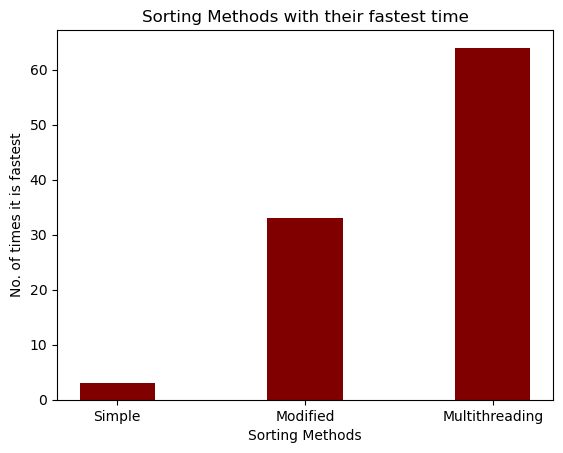

In [92]:
methods=list(data.keys())
values=list(data.values())
plt.bar(methods, values, color ='maroon', width = 0.4)
plt.xlabel("Sorting Methods")
plt.ylabel("No. of times it is fastest")
plt.title("Sorting Methods with their fastest time")
plt.show()

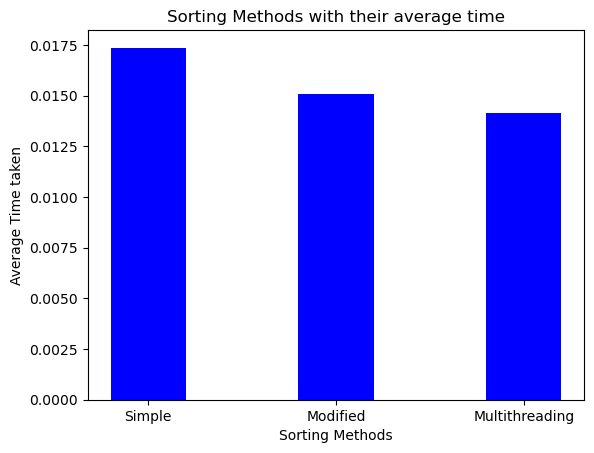

In [93]:
avg_time["Simple"]/=100
avg_time["Modified"]/=100
avg_time["Multithreading"]/=100

methods2=list(avg_time.keys())
values2=list(avg_time.values())
plt.bar(methods2, values2, color ='blue', width = 0.4)
plt.xlabel("Sorting Methods")
plt.ylabel("Average Time taken")
plt.title("Sorting Methods with their average time")
plt.show()